In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc , precision_score , classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

In [2]:
df = pd.read_csv('train.csv')
df = df.sample(frac=0.2, random_state=1)
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
32655,6838,EPX,Travel Agency,Online,1 way Comprehensive Plan,19,INDONESIA,20.00,0.00,36,0
6830,4794,SSI,Airlines,Online,Ticket Protector,111,SINGAPORE,22.12,6.20,48,0
20050,3097,EPX,Travel Agency,Online,2 way Comprehensive Plan,23,INDIA,26.00,0.00,39,0
47835,4318,EPX,Travel Agency,Online,2 way Comprehensive Plan,80,SINGAPORE,97.00,0.00,36,0
8153,2221,C2B,Airlines,Online,Annual Silver Plan,364,SINGAPORE,252.85,63.21,61,1


# Spliting data into train and test

In [3]:
y_true = df.Claim.values
result = df

In [4]:
train_df, test_df,y_train, y_test = train_test_split(result, y_true, stratify = y_true, test_size = 0.2)

In [5]:
print(' Number of data points in train data :' ,train_df.shape[0])
print(' Number of data points in test data :' ,test_df.shape[0])

 Number of data points in train data : 8369
 Number of data points in test data : 2093


# Exploratory data analysis

In [6]:
df.drop('ID',1).describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,59.376219,48.900969,12.373642,39.485089,0.168515
std,120.266449,61.848927,23.478199,13.485511,0.374341
min,0.000000,-357.500000,0.000000,3.000000,0.000000
25%,10.000000,20.000000,0.000000,34.000000,0.000000
50%,24.000000,29.000000,0.000000,36.000000,0.000000
75%,59.000000,54.500000,13.380000,43.000000,0.000000
max,4844.000000,666.000000,262.600000,118.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 32655 to 24349
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10462 non-null  int64  
 1   Agency                10462 non-null  object 
 2   Agency Type           10462 non-null  object 
 3   Distribution Channel  10462 non-null  object 
 4   Product Name          10462 non-null  object 
 5   Duration              10462 non-null  int64  
 6   Destination           10462 non-null  object 
 7   Net Sales             10462 non-null  float64
 8   Commision (in value)  10462 non-null  float64
 9   Age                   10462 non-null  int64  
 10  Claim                 10462 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 980.8+ KB


In [8]:
df.describe(include=['O'])

,Agency,Agency Type,Distribution Channel,Product Name,Destination
count,10462,10462,10462,10462,10462
unique,16,2,2,25,83
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
freq,5293,7033,10280,2651,2803


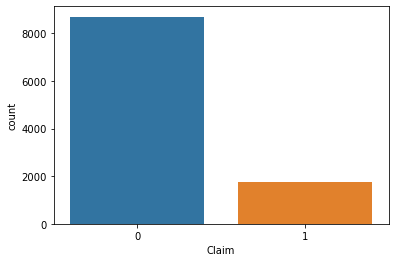

In [9]:
ax = sns.countplot(x="Claim", data=df)

## Univariate Analysis

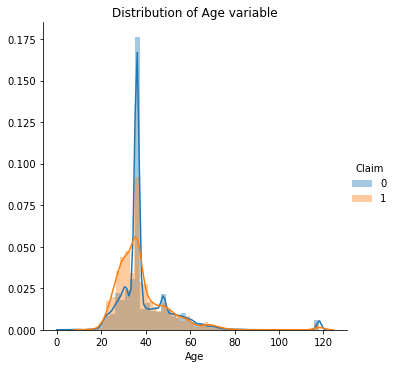

In [10]:
sns.FacetGrid(df, hue="Claim", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title('Distribution of Age variable')
plt.show();

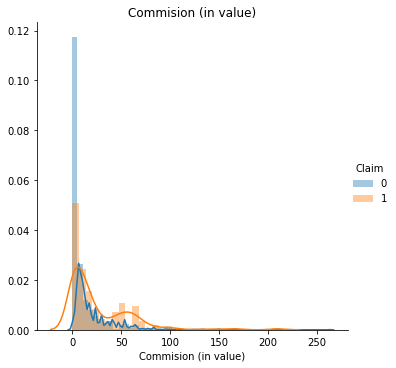

In [11]:
sns.FacetGrid(df, hue="Claim", size=5) \
   .map(sns.distplot, "Commision (in value)") \
   .add_legend();
plt.title('Commision (in value)')
plt.show();

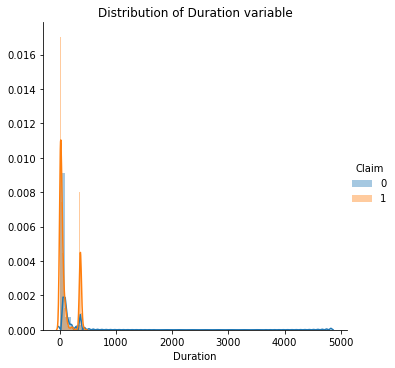

In [12]:
sns.FacetGrid(df, hue="Claim", size=5) \
   .map(sns.distplot, "Duration") \
   .add_legend();
plt.title('Distribution of Duration variable')
plt.show();

## Bivariate Analysis

In [13]:
data = df[['Duration', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim']]
data

,Duration,Net Sales,Commision (in value),Age,Claim
32655,19,20.00,0.00,36,0
6830,111,22.12,6.20,48,0
20050,23,26.00,0.00,39,0
47835,80,97.00,0.00,36,0
8153,364,252.85,63.21,61,1
...,...,...,...,...,...
17216,73,20.00,0.00,36,0
9368,71,13.00,0.00,36,0
30559,40,74.00,0.00,36,0
23934,22,16.00,0.00,28,0


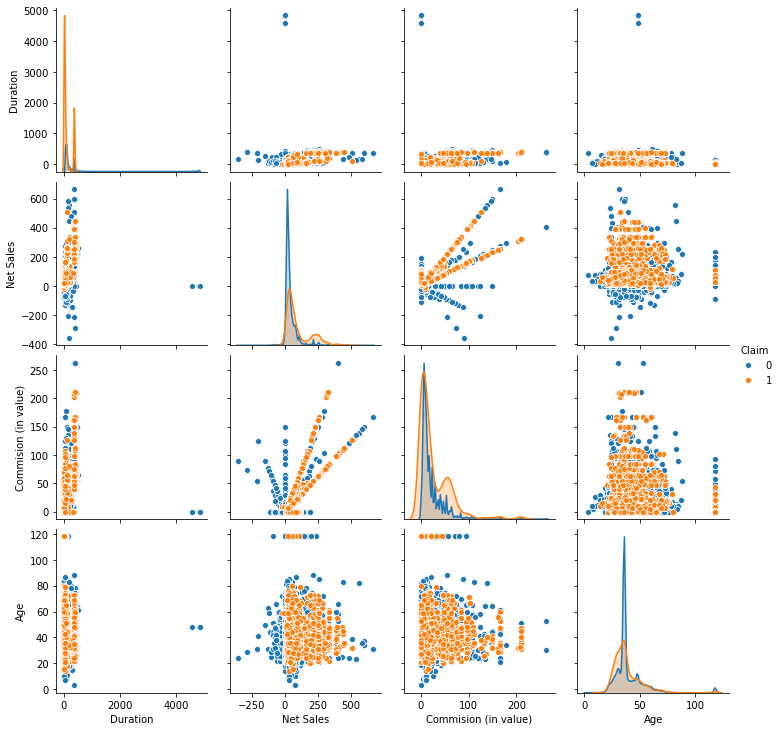

In [14]:
sns.pairplot(data, hue="Claim")

### Distribution of y_i's in Train and test

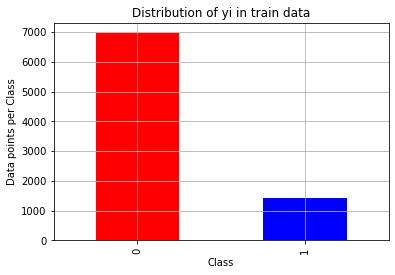

Number of data points in class 0 : 6959 ( 83.152 %)
Number of data points in class 1 : 1410 ( 16.848 %)
--------------------------------------------------------------------------------


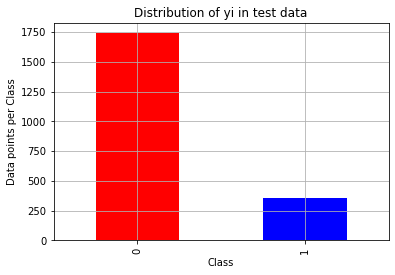

Number of data points in class 0 : 1740 ( 83.134 %)
Number of data points in class 1 : 353 ( 16.866 %)


In [15]:
train_class_distribution = train_df['Claim'].value_counts().sort_index()
test_class_distribution = test_df['Claim'].value_counts().sort_index()

train_class_distribution.plot(kind = 'bar', color=['r','b'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()
for i in range(0,2):
     print('Number of data points in class', i, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')
print('-'*80)

test_class_distribution.plot(kind = 'bar', color=['r','b'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()
for i in range(0,2):
     print('Number of data points in class', i, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

# Feature Transformation

 OneHot Encoding

# Standard Scaling of numerical columns

In [16]:
num_train = train_df.iloc[::,[5,7,8,9]]
num_test = test_df.iloc[::,[5,7,8,9]]
cols = list(num_train.columns)
cols

['Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [17]:
scalar = StandardScaler(with_mean=False)
scale_train = pd.DataFrame(scalar.fit_transform(num_train),columns=cols)
scale_test = pd.DataFrame(scalar.transform(num_test),columns=cols)

### After Standardization

In [18]:
scale_train.describe()

,Duration,Net Sales,Commision (in value),Age
count,8369.000000,8369.000000,8369.000000,8369.000000
mean,0.468110,0.793255,0.531180,2.938273
std,1.000060,1.000060,1.000060,1.000060
min,0.000000,-5.866196,0.000000,0.520303
25%,0.079527,0.328179,0.000000,2.527186
50%,0.190865,0.475859,0.000000,2.675844
75%,0.461258,0.886083,0.568658,3.196146
max,38.523004,10.928354,11.531241,8.770821


# ONE HOT ENCODING

In [19]:
new_Xtrain = train_df.iloc[::,[1,2,3,4,6]]
new_Xtest = test_df.iloc[::,[1,2,3,4,6]]
cols = list(new_Xtrain.columns)
cols

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Destination']

In [20]:
new_Xtrain

,Agency,Agency Type,Distribution Channel,Product Name,Destination
22178,SSI,Airlines,Online,Ticket Protector,SINGAPORE
2541,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,PORTUGAL
39834,C2B,Airlines,Online,Annual Silver Plan,SINGAPORE
36947,EPX,Travel Agency,Online,Cancellation Plan,MALAYSIA
719,EPX,Travel Agency,Online,Cancellation Plan,MALAYSIA
...,...,...,...,...,...
66,EPX,Travel Agency,Online,Cancellation Plan,UNITED STATES
45237,C2B,Airlines,Online,Bronze Plan,SINGAPORE
43979,EPX,Travel Agency,Online,Cancellation Plan,UNITED KINGDOM
37788,EPX,Travel Agency,Online,2 way Comprehensive Plan,THAILAND


In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(new_Xtrain)

OneHotEncoder(handle_unknown='ignore')

In [22]:
new_Xtrain = enc.transform(new_Xtrain).toarray()
new_Xtest = enc.transform(new_Xtest).toarray()
new_Xtrain = pd.DataFrame(new_Xtrain)
new_Xtest = pd.DataFrame(new_Xtest)

# Merging dataframes of categorical and numerical = OHE

In [23]:
final_train_ohe = pd.concat([new_Xtrain,scale_train],1)
final_test_ohe = pd.concat([new_Xtest,scale_test],1)
final_train_ohe

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,Duration,Net Sales,Commision (in value),Age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.485116,0.026418,0.019760,3.567791
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.542829,2.599176,4.173378,3.270475
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.022036,4.845284,3.241672,3.790778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.087480,0.164089,0.000000,2.675844
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.190865,0.180498,0.000000,2.155541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.079527,1.312715,0.000000,5.500345
8365,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.079527,0.283645,0.189765,3.790778
8366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.198818,0.443041,0.000000,2.675844
8367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023858,0.377406,0.000000,3.121817


In [24]:
print('OHE X_train :', final_train_ohe.shape)
print('OHE X_test :', final_test_ohe.shape)

OHE X_train : (8369, 128)
OHE X_test : (2093, 128)


# Machine Learning Models

In [25]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
 
    A =(((C.T)/(C.sum(axis=1))).T)

    B =(C/C.sum(axis=0))

    labels = [0,1]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(5,3))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [26]:
def knn_brute_force(Xtrain,ytrain):
    """
    Function to fine the best k neighbors.
    Input : Training data
    ---
    Output : best value of K
    """
    K = [11,15,17,23]#using odd numbers for K in knn
    neigh = KNeighborsClassifier(algorithm='brute')
    parameters = {'n_neighbors':K}
    clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain, ytrain)

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    best_k= clf.best_params_
    best_k = list(best_k.values())[0]

    plt.plot(K, train_auc, label='Train AUC')
    plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
    
    plt.plot(K, cv_auc, label='CV AUC')
    plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')
    plt.grid(True)
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    return best_k 

def final_knn_brute(Xtrain,ytrain,Xtest,ytest,best_K):
    """
    Function to find the model with best hyperparameter
    Input : Training data, Test Data and best value of k
    ---
    Output : best trained model
    """

    neigh = KNeighborsClassifier(n_neighbors=best_K, algorithm='brute')
    neigh.fit(Xtrain, ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, neigh.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, neigh.predict_proba(Xtest)[:,1])
    plt.grid(True)
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return neigh

# 1 .K Nearest Neighbour Classification with OHE

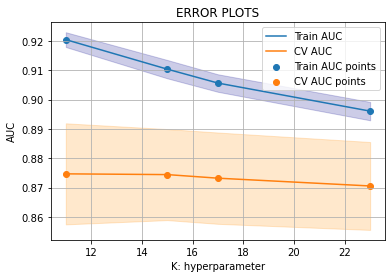

Best K is : 11
Wall time: 39.9 s


In [27]:
%%time
best_K_ohe = knn_brute_force(final_train_ohe,y_train)
print('Best K is :', best_K_ohe)

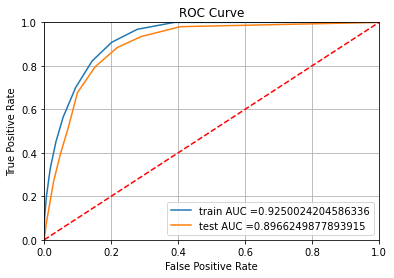

-------------------- Confusion matrix --------------------


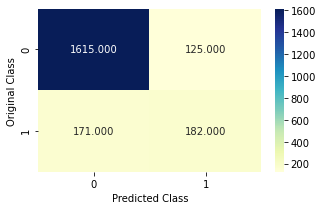

-------------------- Precision matrix (Columm Sum=1) --------------------


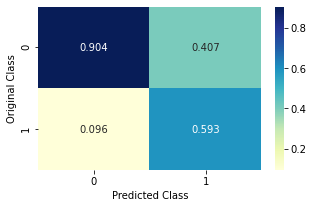

-------------------- Recall matrix (Row sum=1) --------------------


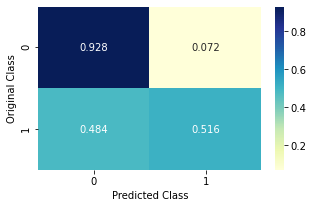

In [28]:
knn_brutemodel_ohe = final_knn_brute(final_train_ohe,y_train,final_test_ohe, y_test,best_K_ohe)
plot_confusion_matrix(y_test,knn_brutemodel_ohe.predict(final_test_ohe))

# 2 . Logistic Regression

In [29]:
def logit(Xtrain,ytrain):
    """
    Function to find the best hyperparameter
    Input : Training Dataset
    ---
    Output : best hyperparameter
    """
    parameters = [{'C': [10**x for x in range(-4,5)]}]
    K =[10**x for x in range(-4,5)]
    K = np.log10(K)
    
    log= LogisticRegression(class_weight = 'balanced')
    clf = GridSearchCV(log, parameters, cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain, ytrain)

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    lamb= clf.best_params_
    lamb = list(lamb.values())[0]

    plt.plot(K, train_auc, label='Train AUC')
    # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
    
    plt.plot(K, cv_auc, label='CV AUC')
    plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
    plt.scatter(K, train_auc, label='Train AUC points')
    plt.scatter(K, cv_auc, label='CV AUC points')
    plt.grid(True)
    plt.legend()
    plt.xlabel("C: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.show()
    return lamb

def final_logl2(Xtrain,ytrain,Xtest,ytest,best_c):
    """
    Function to find the model with best hyperparameter
    Input : Training data, Test Data and best value of c
    ---
    Output : best trained model
    """
    logl2 = LogisticRegression(C= best_c,class_weight = 'balanced')
    logl2.fit(Xtrain, ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, logl2.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, logl2.predict_proba(Xtest)[:,1])
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return logl2

###  Logistic Regression with OHE

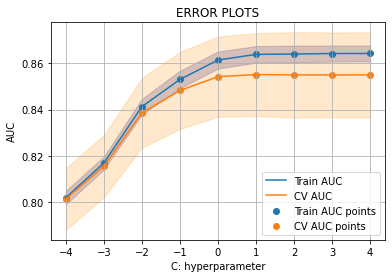

best c using L2 : 10
Wall time: 7.81 s


In [30]:
%%time
best_c_ohe = logit(final_train_ohe,y_train)
print('best c using L2 :',best_c_ohe)

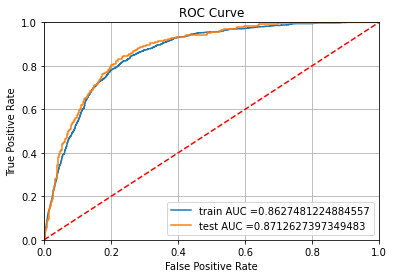

-------------------- Confusion matrix --------------------


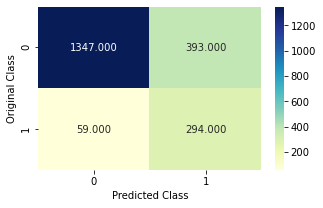

-------------------- Precision matrix (Columm Sum=1) --------------------


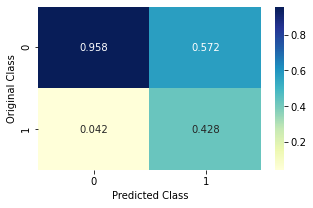

-------------------- Recall matrix (Row sum=1) --------------------


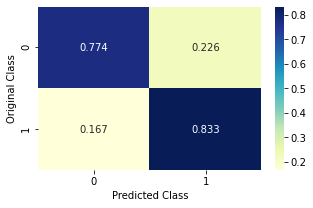

In [31]:
log_model_ohe= final_logl2(final_train_ohe,y_train,final_test_ohe, y_test,best_c_ohe)
plot_confusion_matrix(y_test,log_model_ohe.predict(final_test_ohe))

# 3 .Decision Tree

In [32]:
def dtc(Xtrain,ytrain):
    """
    Function to find the best hyperparameter 
    Returns : best parameters of DecisionTree Calssifier
    ---
    Input : Dataset
    """
    max_depth = [110,160,210,300]
    min_samples_split = [2,4,10,50,80]
    parameters = {'max_depth': max_depth, 'min_samples_split' :min_samples_split}
    clftree = DecisionTreeClassifier()
    clf = GridSearchCV(clftree,parameters,cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain,ytrain)
    tab = pd.DataFrame(clf.cv_results_)
    import seaborn as sns
    plt.figure(figsize=(15, 8))
    max_scores = tab.groupby(['param_max_depth','param_min_samples_split']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.title('Grid Search CV Score on Train and Test Data')
    plt.show()
    best_parameter= clf.best_params_
    print('Best depth: ', clf.best_estimator_.max_depth)
    print('Best samples split: ', clf.best_estimator_.min_samples_split)
    return clf.best_estimator_.max_depth, clf.best_estimator_.min_samples_split

def final_tree( Xtrain ,ytrain ,Xtest ,ytest , param1 , param2):
    """
    Returns : Model
    ---
    Input : Train dataset, Test Dataset , best parameters
    """
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier

    clftre = DecisionTreeClassifier(class_weight='balanced',min_samples_split=param1, max_depth=param2)
    clftre.fit(Xtrain,ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(y_train, clftre.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, clftre.predict_proba(Xtest)[:,1])
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return  clftre

# Decision Tree with OHE

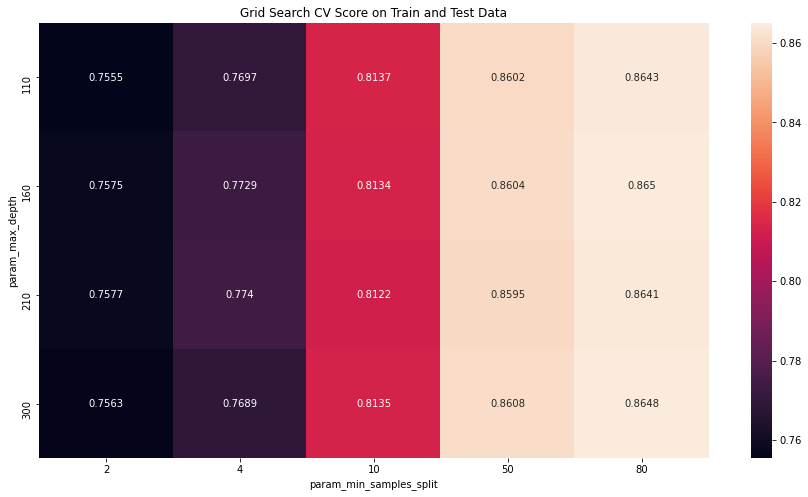

Best depth:  160
Best samples split:  80
Wall time: 7.98 s


In [35]:
%%time
best_depth_dt_ohe, best_samle_split_dt_ohe = dtc(final_train_ohe,y_train)

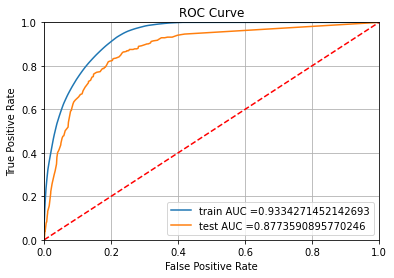

-------------------- Confusion matrix --------------------


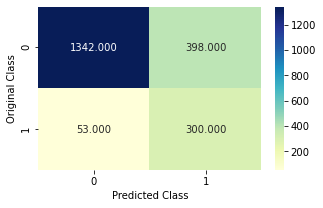

-------------------- Precision matrix (Columm Sum=1) --------------------


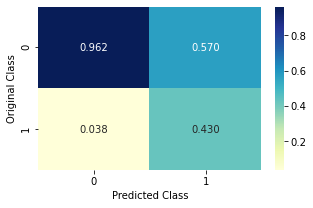

-------------------- Recall matrix (Row sum=1) --------------------


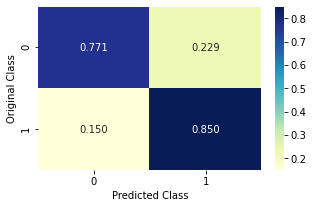

In [36]:
dt_ohe= final_tree(final_train_ohe,y_train, final_test_ohe, y_test,best_samle_split_dt_ohe,best_depth_dt_ohe)
plot_confusion_matrix(y_test,dt_ohe.predict(final_test_ohe))

# 4 Random Forest

In [37]:
def best_RF(Xtrain,ytrain):
    """
    Function to find the best hyperparameter of random forest
    Returns : best depth and best number of models
    ---
    Input : Training dataset
    """
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    max_depth = [130,170,190,]
    n_models = [110,150,190]
    parameters = {'max_depth':  max_depth, 'n_estimators' :n_models}
    clftree = RandomForestClassifier(class_weight='balanced')
    clf = GridSearchCV(clftree,parameters,cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain,ytrain)
    tab = pd.DataFrame(clf.cv_results_)
    import seaborn as sns
    plt.figure(figsize=(15, 8))
    max_scores = tab.groupby(['param_max_depth','param_n_estimators']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.title('Grid Search CV Score on Train and Test Data')
    plt.show()
    best_parameter= clf.best_params_
    print('Best depth: ', clf.best_estimator_.max_depth)
    print('Best n estimators: ', clf.best_estimator_.n_estimators)
    return clf.best_estimator_.max_depth, clf.best_estimator_.n_estimators

def final_RF( Xtrain ,ytrain ,Xtest ,ytest , param1 , param2):
    """
    Returns : threshold values, False positive rate , True positive rate and the trained model
    ---
    Input : Train dataset, Test Dataset , best parameters
    """
    clftre = RandomForestClassifier(class_weight='balanced',n_estimators=param1, max_depth=param2,criterion='entropy',min_samples_leaf=3)
    clftre.fit(Xtrain,ytrain)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, clftre.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, clftre.predict_proba(Xtest)[:,1])
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return  clftre

# Random Forest with OHE

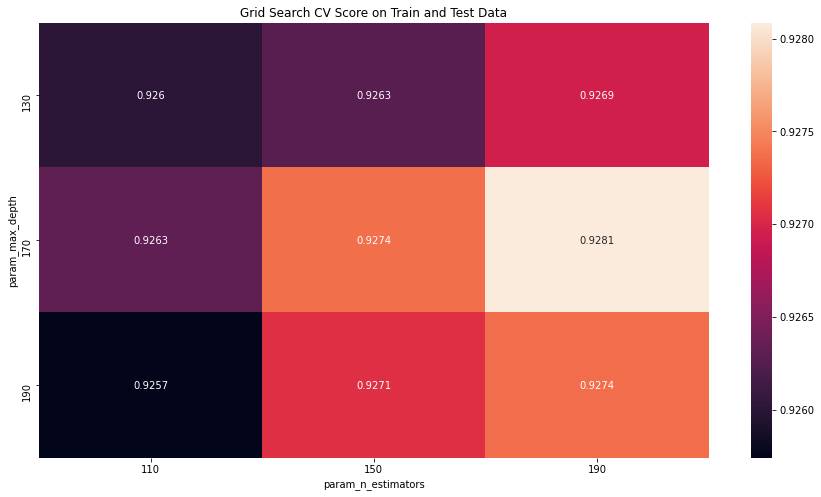

Best depth:  170
Best n estimators:  190
Wall time: 1min 19s


In [38]:
%%time
best_depth_rf_ohe, best_samle_split_rf_ohe = best_RF(final_train_ohe,y_train)

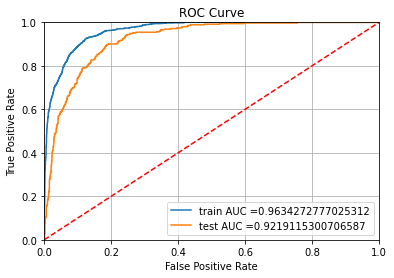

-------------------- Confusion matrix --------------------


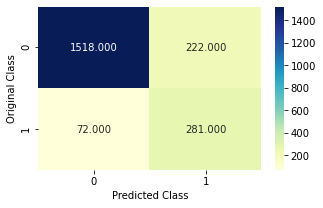

-------------------- Precision matrix (Columm Sum=1) --------------------


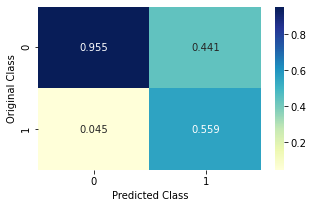

-------------------- Recall matrix (Row sum=1) --------------------


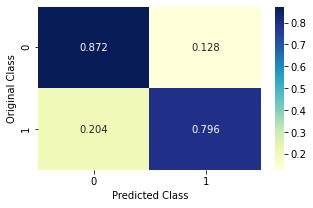

In [39]:
rf_ohe= final_RF(final_train_ohe,y_train, final_test_ohe, y_test,best_depth_rf_ohe,best_samle_split_rf_ohe)
plot_confusion_matrix(y_test,rf_ohe.predict(final_test_ohe))

# 5. GBDT using Xgboost

In [40]:
def best_GBDT(Xtrain,ytrain):
    """
    Input : Training Data
    ---
    Output :Best parameters
    """
    max_depth = [140,150,160]
    n_models = [90,130,200,400]
    parameters = {'max_depth': max_depth, 'n_estimators' :n_models}
    clftree = XGBClassifier(booster='gbtree')
    clf = GridSearchCV(clftree,parameters,cv=3, scoring='roc_auc',return_train_score=True)
    clf.fit(Xtrain,y_train)
    tab = pd.DataFrame(clf.cv_results_)
    import seaborn as sns
    plt.figure(figsize=(15, 8))
    max_scores = tab.groupby(['param_max_depth','param_n_estimators']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.title('Grid Search CV Score on Train and Test Data')
    plt.show()
    best_parameter= clf.best_params_
    print('Best depth: ', clf.best_estimator_.max_depth)
    print('Best n estimators: ', clf.best_estimator_.n_estimators)
    return clf.best_estimator_.max_depth, clf.best_estimator_.n_estimators

def final_GBDT( Xtrain ,ytrain ,Xtest ,ytest , param1 , param2):
    """
    Returns : threshold values, False positive rate , True positive rate and the trained model
    ---
    Input : Train dataset, Test Dataset , best parameters
    """
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    from xgboost import XGBClassifier
    clftre = XGBClassifier(booster='gbtree', n_estimators=param1 , max_depth=param2)
    clftre.fit(Xtrain,ytrain)
    train_fpr, train_tpr, thresholds = roc_curve(ytrain, clftre.predict_proba(Xtrain)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(ytest, clftre.predict_proba(Xtest)[:,1])
    
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    return clftre

#  GBDT with OHE

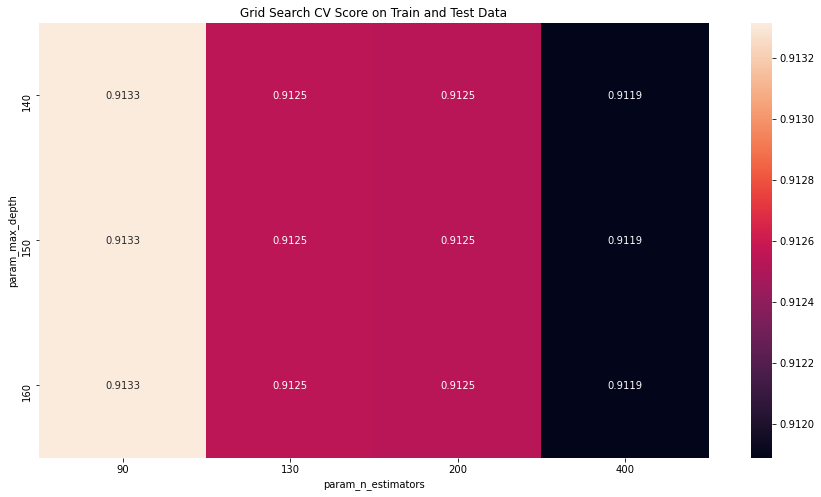

Best depth:  140
Best n estimators:  90
Wall time: 2min 58s


In [41]:
%%time
best_depth_xg_ohe, best_samle_split_xg_ohe = best_GBDT(final_train_ohe,y_train)

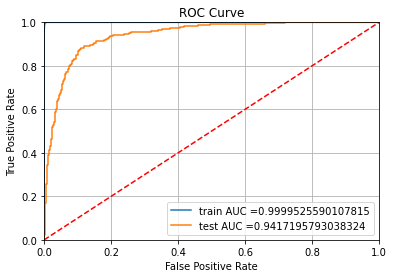

-------------------- Confusion matrix --------------------


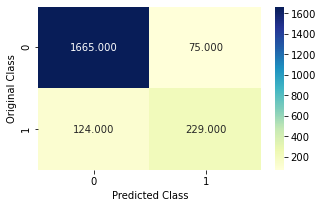

-------------------- Precision matrix (Columm Sum=1) --------------------


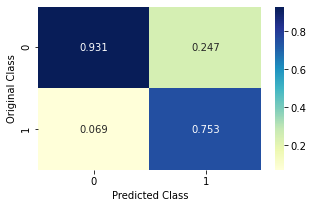

-------------------- Recall matrix (Row sum=1) --------------------


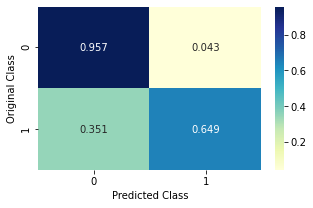

In [42]:
xg_ohe= final_GBDT(final_train_ohe,y_train, final_test_ohe, y_test,best_samle_split_xg_ohe,best_depth_xg_ohe)
plot_confusion_matrix(y_test,xg_ohe.predict(final_test_ohe))

# 6 .Stacking all models

### with ohe

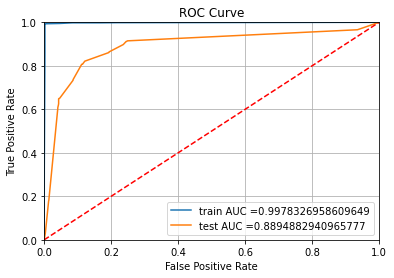

Wall time: 14.4 s


In [43]:
%%time
from mlxtend.classifier import StackingClassifier
m_classifier=LogisticRegression(random_state=0)

# Code starts here
sclf_ohe = StackingClassifier(classifiers = [knn_brutemodel_ohe,log_model_ohe,dt_ohe,rf_ohe,xg_ohe], meta_classifier=m_classifier)
sclf_ohe.fit(final_train_ohe,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, sclf_ohe.predict_proba(final_train_ohe)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, sclf_ohe.predict_proba(final_test_ohe)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

-------------------- Confusion matrix --------------------


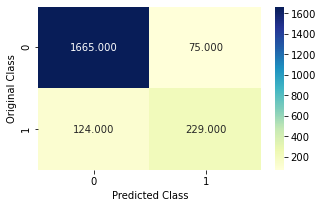

-------------------- Precision matrix (Columm Sum=1) --------------------


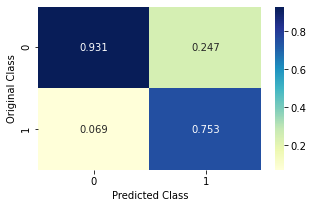

-------------------- Recall matrix (Row sum=1) --------------------


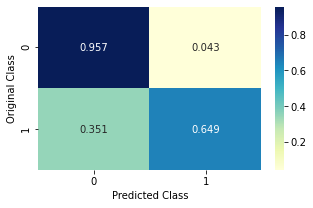

In [44]:
plot_confusion_matrix(y_test,sclf_ohe.predict(final_test_ohe))

# ===========================END==============================